# Материалы
* Презентация: https://disk.yandex.ru/i/bHR20_-24jumFQ

## Изучение данных и подготовка к анализу

In [1]:
import pandas as pd
import numpy as np
import math as mth
from scipy import stats as st
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from plotly import graph_objects as go

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [3]:
data.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
event.time    74197 non-null object
event.name    74197 non-null object
user.id       74197 non-null object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')

In [6]:
sources.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [7]:
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
userId    4293 non-null object
source    4293 non-null object
dtypes: object(2)
memory usage: 67.2+ KB


Переименуем названия столбцов в обеих таблицах:

In [8]:
data = data.rename(columns={'event.time': 'event_time', 'event.name': 'event_name',
                        'user.id': 'user_id'})

In [9]:
sources = sources.rename(columns={'userId': 'user_id'})

Заменим тип данных в таблице data в столбце event_time и добавим новый столбец дат:

In [10]:
data['event_time'] = pd.to_datetime(data['event_time'])
data['event_date'] = data['event_time'].astype('datetime64[D]')

Проверим данные на наличие дубликатов:

In [11]:
data.duplicated().sum()

0

In [12]:
sources.duplicated().sum()

0

Объединим две имеющиеся таблицы по столбцу user_id:

In [13]:
df = data.merge(sources, on='user_id', how = 'outer')

In [14]:
df.head()

,event_time,event_name,user_id,event_date,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 5 columns):
event_time    74197 non-null datetime64[ns]
event_name    74197 non-null object
user_id       74197 non-null object
event_date    74197 non-null datetime64[ns]
source        74197 non-null object
dtypes: datetime64[ns](2), object(3)
memory usage: 3.4+ MB


Методом value_counts() выведем на экран количество уникальных значений в столбцах event_name и source и убедимся, что все названия в этих столбцах записаны одинаковым регистром. Таким образом проверим данные на наличие неявных дубликатов.

In [16]:
df['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

Заменим название всех действий, связанных с поиском по сайту на search, а название действия show_contacts на contacts_show, тк это по сути одно и тоже действие.

In [17]:
df['event_name'] = df['event_name'].str.replace('search_+\d', 'search')

In [18]:
df['event_name'] = df['event_name'].str.replace('show_contacts', 'contacts_show')

### Вывод

В нашем распоряжении таблица с данными пользователей (df), впервые совершивших действия в приложении после 7 октября 2019 года. Мы получили таблицу df путём объединения исходных двух таблиц с данными о событиях и с данными об источниках. В таблице df нет пропусков и дубликатов. Тип данных в cтолбце даты и времени был заменён на корректный, был добавлен новый столбец дат, заменены названия стобцов. Название целевого события show_contacts было заменено на contacts_show, а все названия событий, связанных с поиском по приложению - на search. Теперь данные готовы для анализа.

## Исследовательский анализ данных

* Сколько всего событий в логе?
* Сколько всего пользователей в логе?
* Сколько в среднем событий приходится на пользователя?
* Данными за какой период мы располагаем?
* Нам доступны одинаково полные данные за весь период?

In [19]:
total_events = len(df)
print('Событий в логе:', total_events)

Событий в логе: 74197


In [20]:
total_users = len(df['user_id'].unique())
print('Пользователей в логе:', total_users)

Пользователей в логе: 4293


In [21]:
events_per_user = (total_events / total_users)
print('В среднем событий приходится на пользователя:', round(events_per_user))

В среднем событий приходится на пользователя: 17


In [22]:
min_analysis_date = df['event_date'].min()
max_analysis_date = df['event_date'].max()
print('Минимальная дата:', min_analysis_date)
print('Максимальная дата:', max_analysis_date)

Минимальная дата: 2019-10-07 00:00:00
Максимальная дата: 2019-11-03 00:00:00


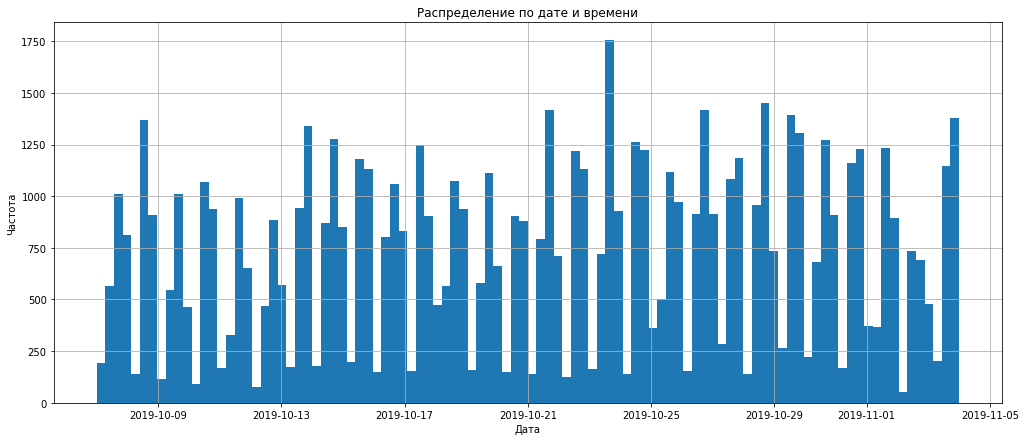

In [23]:
plt.figure(figsize= (17,7))
df['event_time'].hist(bins=100).set(
    title = 'Распределение по дате и времени', xlabel = 'Дата', ylabel = 'Частота')
plt.show()

Данные распределены равномерно, значит нам доступны одинакого полные данные за период 7.10.2019 - 3.11.2019 (4 недели).

### Из каких источников приходят пользователи?

In [24]:
df_sources = df.groupby('source').agg({'user_id': 'nunique'}).reset_index()
df_sources['part'] = df_sources['user_id'] / df_sources['user_id'].sum()
data_sources = df_sources.sort_values(
    'user_id', ascending = False).style.format({'part': '{:,.1%}'.format})
data_sources



,source,user_id,part
2,yandex,1934,45.1%
1,other,1230,28.7%
0,google,1129,26.3%


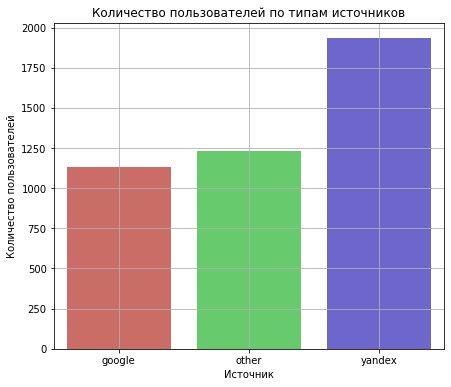

In [25]:
plt.figure(figsize=(7,6))
sns.barplot(x="source", y="user_id", palette='hls', data=df_sources)
plt.title('Количество пользователей по типам источников')
plt.xlabel('Источник')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Наибольшая часть пользователей (45%) установили приложение из Yandex, 29% из других источников и 26% - из Google.

### Как часто встречается каждое из событий?

In [26]:
df1 = df.groupby('event_name').agg({'user_id': 'count'}).sort_values('user_id', ascending = False).reset_index()
df1.columns = ['event_name','count']
df1['part'] = df1['count'] / df1['count'].sum()
df_events = df1.sort_values(
    'count', ascending = False).style.format({'part': '{:,.1%}'.format})
df_events

,event_name,count,part
0,tips_show,40055,54.0%
1,photos_show,10012,13.5%
2,search,6784,9.1%
3,advert_open,6164,8.3%
4,contacts_show,4529,6.1%
5,map,3881,5.2%
6,favorites_add,1417,1.9%
7,tips_click,814,1.1%
8,contacts_call,541,0.7%


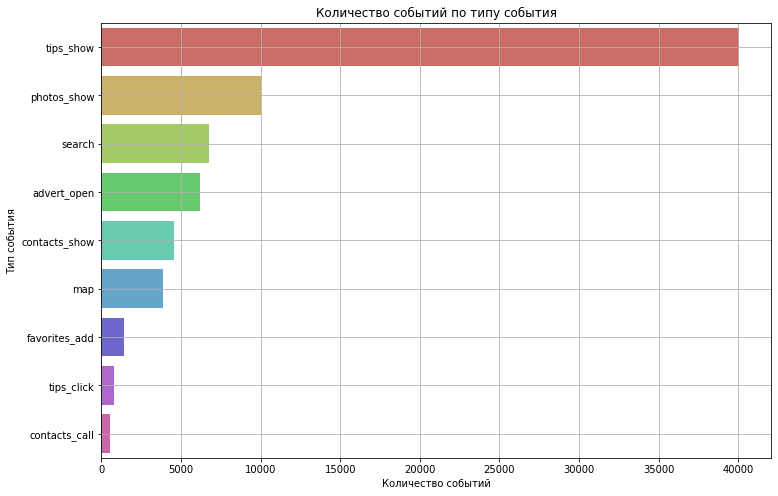

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x='count', y='event_name',  palette='hls', data=df1)
plt.title('Количество событий по типу события')
plt.xlabel('Количество событий')
plt.ylabel('Тип события')
plt.grid()
plt.show()

Самое частое событие (54% всех событий) - увидел рекомендованные объявления (tips_show), на втором месте событие photos_show (13,5%) - просмотрел фотографий в объявлении, а на третьем месте поиски по приложению search (9%). Самые редкие события (менее 2% всех событий) - favorites_add, tips_click и contacts_call (добавил объявление в избранное, кликнул по рекомендованному объявлению и позвонил по номеру из объявления).

### Сколько пользователей совершали каждое из этих событий?

In [28]:
events = df.groupby('event_name').agg({'user_id': 'nunique'}).sort_values(
    'user_id', ascending=False).reset_index()
events.columns = ['event_name', 'nunique']
events['part'] = events['nunique'] / len(df['user_id'].unique())
events

,event_name,nunique,part
0,tips_show,2801,0.652457
1,search,1666,0.388074
2,map,1456,0.339157
3,photos_show,1095,0.255066
4,contacts_show,981,0.228512
5,advert_open,751,0.174936
6,favorites_add,351,0.081761
7,tips_click,322,0.075006
8,contacts_call,213,0.049616


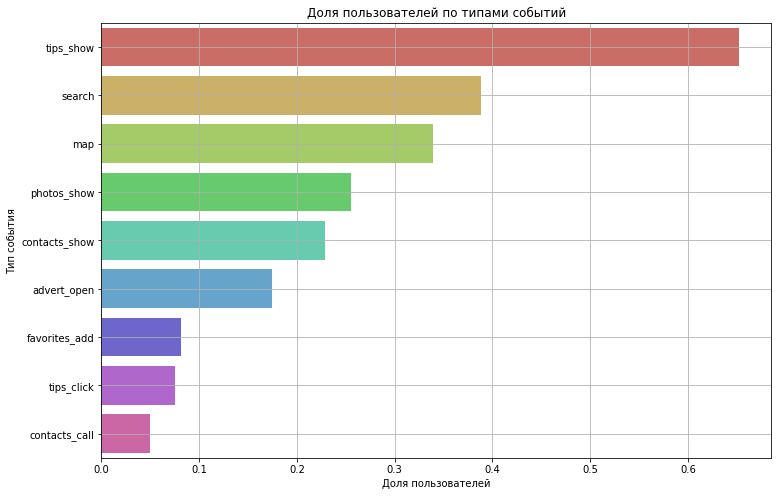

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(y='event_name', x='part', palette='hls', data=events)
plt.title('Доля пользователей по типами событий')
plt.xlabel('Доля пользователей')
plt.ylabel('Тип события')
plt.grid()
plt.show()

Наибольшее кол-во пользователей увидели рекомендованные объявления (65%), на следующем месте по кол-ву пользователей действия связанные с поиском по приложению (39% пользователей). Наименьшая доля пользователей (менее 10%) совершала такие события как favorites_add, tips_click и contacts_call (добавил объявление в избранное, кликнул по рекомендованному объявлению, кликнул по рекомендованному объявлению). Целевое событие contacts_show (посмотрел номер телефона) совершили всего 23% пользователей.

### Какие действия чаще совершают пользователи, которые просматривают контакты?

В отдельный датафрейм сохраним данные о пользователях, которые хотя бы раз совершили действие contacts_show. Посмотрим, какие действия они совершали и как часто.

In [30]:
contacts_show = df.query('event_name == "contacts_show"')

In [31]:
watched_contacts = df[df.user_id.isin(contacts_show.user_id.unique())]

In [32]:
len(watched_contacts)

27197

In [33]:
df_watched_contacts = watched_contacts.groupby('event_name').agg({'user_id': 'count'}).sort_values(
    'user_id', ascending = False).reset_index()
df_watched_contacts.columns = ['event_name', 'count']
df_watched_contacts['part'] = df_watched_contacts['count'] / len(watched_contacts)
df_watched_contacts

,event_name,count,part
0,tips_show,12768,0.469464
1,contacts_show,4529,0.166526
2,photos_show,3828,0.140751
3,search,2084,0.076626
4,advert_open,1589,0.058426
5,map,1101,0.040482
6,contacts_call,541,0.019892
7,favorites_add,424,0.015590
8,tips_click,333,0.012244


Пользователи, совершившие хоть раз целевое действие совершили всего 27197 действий, включая целевое и звонок по номеру из объявления. Так как звонок возможен только со страницы контактов, исключим эти два события и посмотрим на доли оставшихся событий.

In [34]:
filtered = watched_contacts.query(
    'event_name != "contacts_show" and event_name != "contacts_call"')

In [35]:
watched_contacts_filt = filtered.groupby('event_name').agg({'user_id': 'count'}).sort_values(
    'user_id', ascending = False).reset_index()
watched_contacts_filt.columns = ['event_name', 'count']
watched_contacts_filt['part'] = watched_contacts_filt['count'] / len(filtered)
watched_contacts_filt

,event_name,count,part
0,tips_show,12768,0.577033
1,photos_show,3828,0.173001
2,search,2084,0.094184
3,advert_open,1589,0.071813
4,map,1101,0.049758
5,favorites_add,424,0.019162
6,tips_click,333,0.015049


Сравним полученные доли событий с долями событий у пользователей, которые целевое действие не совершали:

In [36]:
no_watched_contacts = df[~df.user_id.isin(contacts_show.user_id.unique())]

In [37]:
df_no_watched_contacts = no_watched_contacts.groupby('event_name').agg({'user_id': 'count'}).sort_values(
    'user_id', ascending = False).reset_index()
df_no_watched_contacts.columns = ['event_name', 'count']
df_no_watched_contacts['part'] = df_no_watched_contacts['count'] / len(no_watched_contacts)
df_no_watched_contacts

,event_name,count,part
0,tips_show,27287,0.580574
1,photos_show,6184,0.131574
2,search,4700,0.100000
3,advert_open,4575,0.097340
4,map,2780,0.059149
5,favorites_add,993,0.021128
6,tips_click,481,0.010234


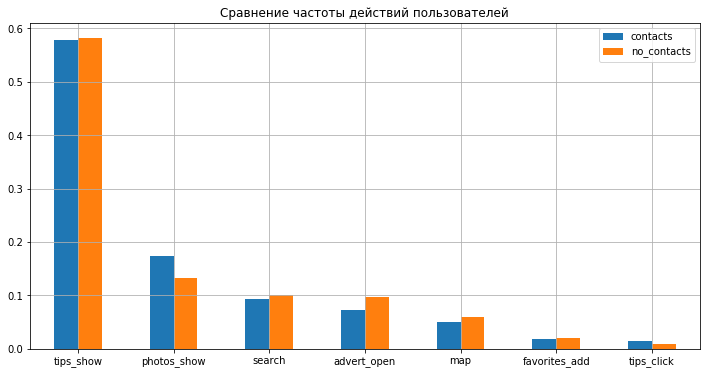

In [38]:
contacts = watched_contacts_filt['part'].round(3).to_list()
no_contacts = df_no_watched_contacts['part'].round(3).to_list()
index = ['tips_show', 'photos_show', 'search',
         'advert_open', 'map', 'favorites_add', 'tips_click']
ab = pd.DataFrame({'contacts': contacts,
                   'no_contacts': no_contacts}, index=index)
ax = ab.plot.bar(rot=0, figsize = (12,6), title = 'Сравнение частоты действий пользователей', grid=True)


In [109]:
ab['part'] = ab['contacts'] / ab['no_contacts']
ab

,contacts,no_contacts,part
tips_show,0.577,0.581,0.993115
photos_show,0.173,0.132,1.310606
search,0.094,0.100,0.940000
advert_open,0.072,0.097,0.742268
map,0.050,0.059,0.847458
favorites_add,0.019,0.021,0.904762
tips_click,0.015,0.010,1.500000


Действия, которые пользователи с целевым действием (contacts_show) совершили **чаще**:
- photos_show (посмотрел фотографии)
- tips_click (кликнул по рекомендованному объявлению)

Действия, которые пользователи с целевым действием (contacts_show) совершили **реже**:
- tips_show (увидел рекомендованные объявления)
- search (действия, связанные с поиском по сайту)
- advert_open (открыл карточки объявления)
- map (открыл карту объявлений)
- favorites_add (добавил объявление в избранное)

Наибольшее отличие в частоте есть у двух действий photos_show и advert_open. Пользователи, смотревшие контакты больше смотрели фотографии, но меньше открывали карточки объявлений. Можно предположить, что фотографии потенциальным покупателям интересны больше, чем описание товара или другая информация на странице объявления.

### Как влияют на действие contacts_show каждое из дополнительных действий?

Построим сводную таблицу, строками которой будут идентификаторы пользователей, столбцами действия, а значениями - сколько раз пользователь совершил действие. Пропущенные значения заменим на нули  и приведём все значения к целочисленному типу данных. Построим матрицу корреляций и отобразим её.

In [110]:
df_final = df.pivot_table(index='user_id', columns = 'event_name', values = 'event_date', aggfunc='count').reset_index()
df_final.head()

event_name,user_id,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search,tips_click,tips_show
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,29.0
1,00157779-810c-4498-9e05-a1e9e3cedf93,2.0,5.0,11.0,2.0,NaN,33.0,18.0,NaN,NaN
2,00463033-5717-4bf1-91b4-09183923b9df,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,5.0,NaN,NaN,NaN,6.0,NaN,17.0,NaN,4.0
4,00551e79-152e-4441-9cf7-565d7eb04090,NaN,3.0,3.0,NaN,NaN,1.0,1.0,NaN,NaN


In [111]:
df_f = df_final.drop('user_id', 1)
df_f = df_f.fillna('0')
df_f = df_f.astype('int')

In [112]:
cm = df_f.corr()

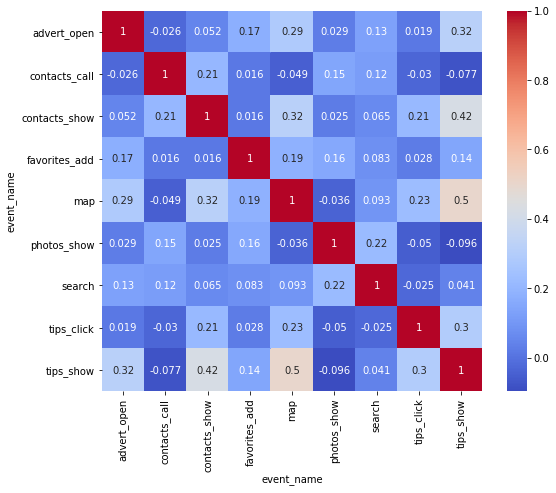

In [113]:
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot = True, square=True, cmap="coolwarm")
plt.show()

Для найденных корреляций с помощью матрицы диаграмм рассеяния проверим, какая связь между переменными - линейная или нелинейная. 

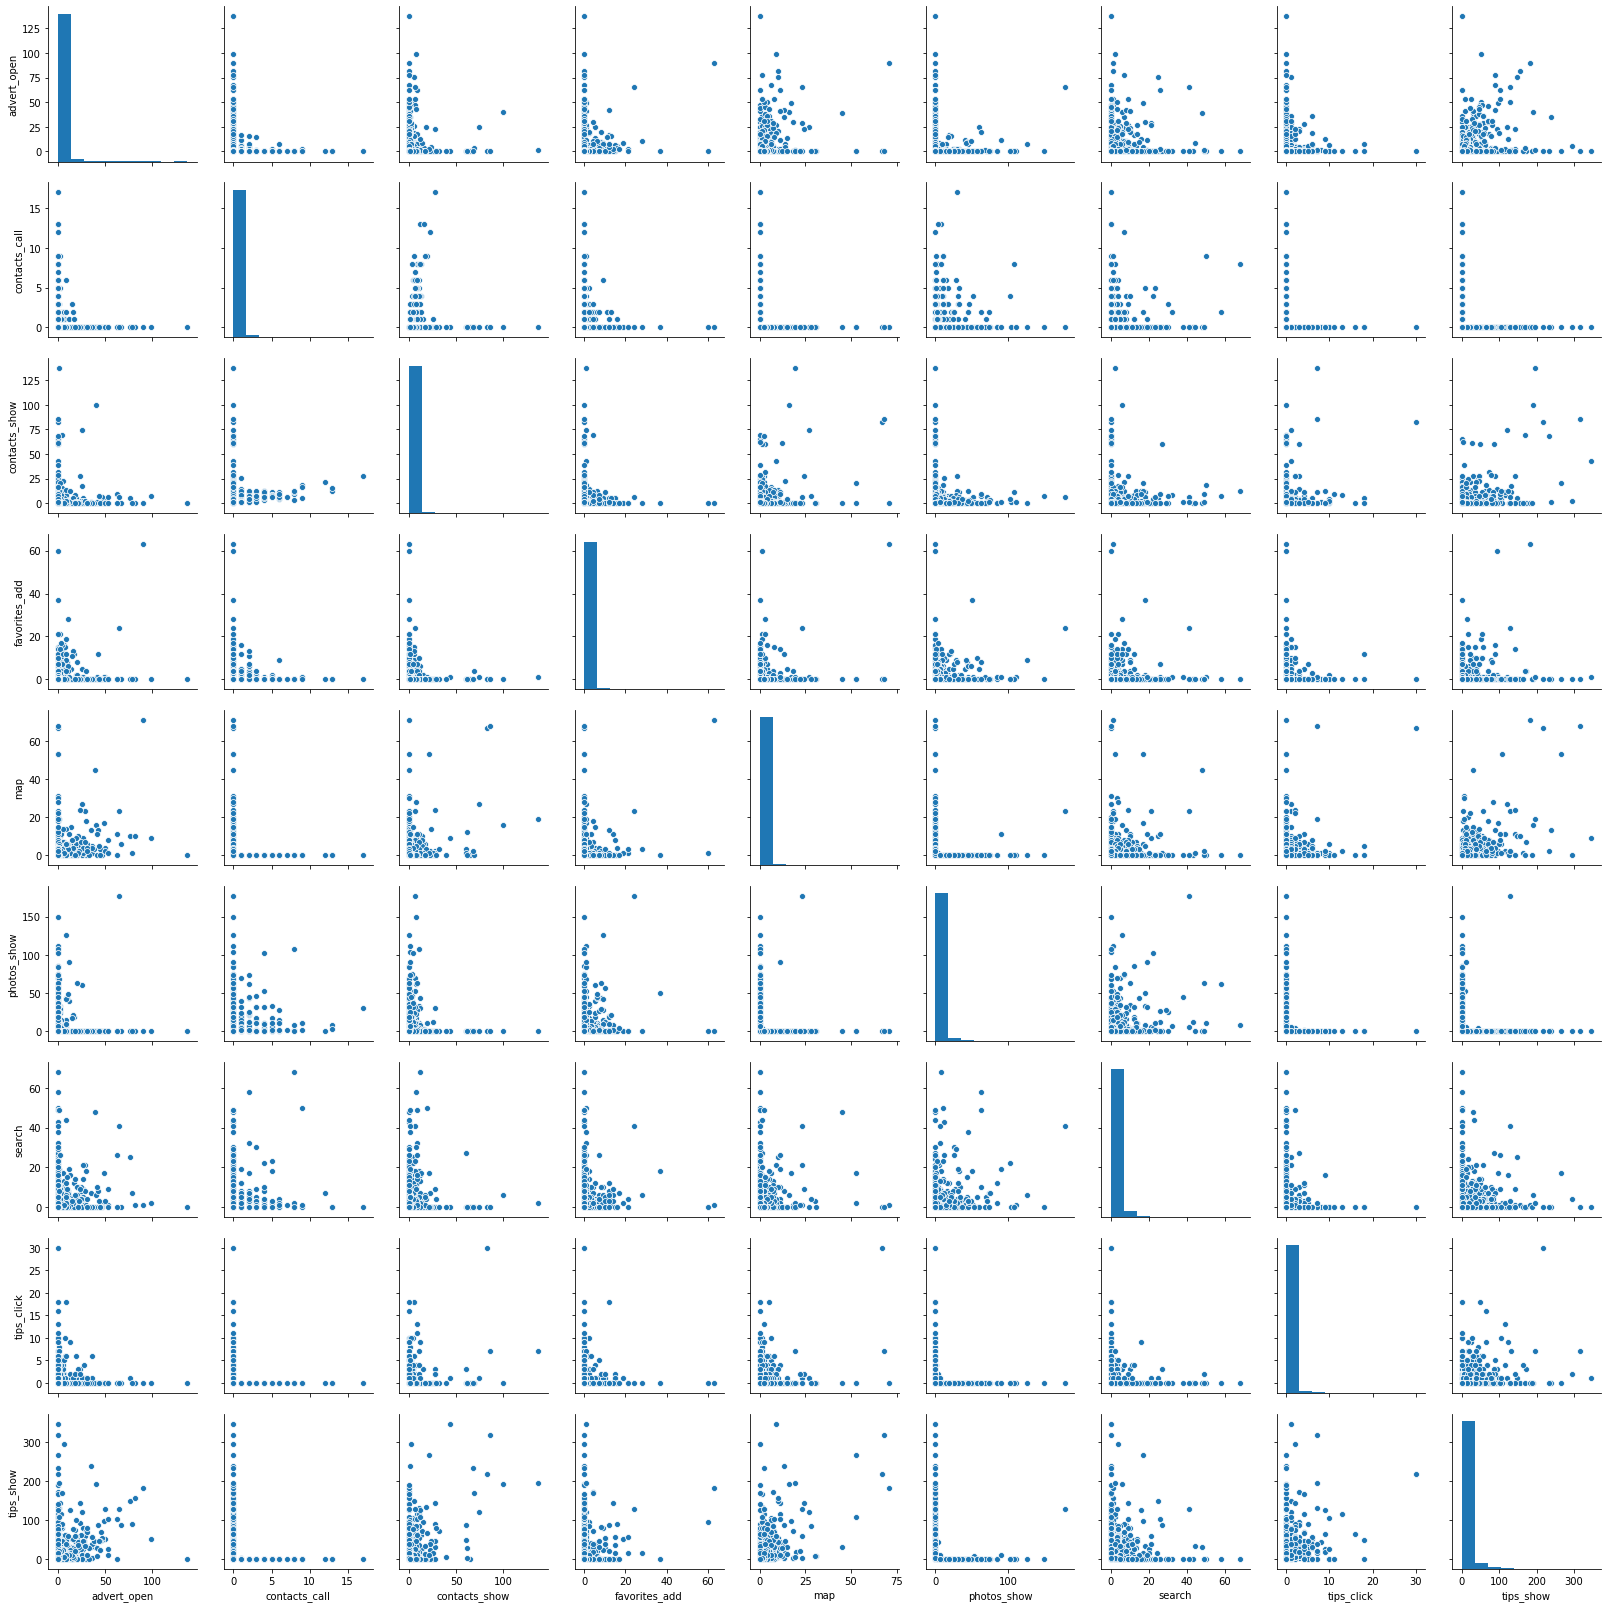

In [114]:
sns.pairplot(df_f)

Связь между признаками не является линейной, а значит коэффициент корреляции в его принятой для линейной связи форме не может отражать интенсивность связи.

### Вывод

Нам доступны данные за 4 недели (с 7 октября по 3 ноября 2019 года). Данные содержат информацию о 4293 пользователях, которые совершили 74197 действий в приложении. Наибольшая часть пользователей (45%) установили приложение с Yandex, 29% с других источников и 26% с Google. Чаще всего (40055 раз) пользователи совершали действие tips_show (увидел рекомендованные объявления), довольно часто (10012 раз) - действие photos_show (смотрел фотографий в объявлении). 65 % пользователей совершили самое частое событие tips_show, а целевое событие contacts_show (посмотрел номер телефона) совершили только 23% пользователей. Пользователи, совершившие целевое действие чаще совершали действия photos_show (смотрел фотографий в объявлении) и действие tips_click (кликнул по рекомендованному объявлению), чем пользователи, которые целевое действие не совершали. Все остальные действия пользователи, совершившие целевое действие совершали реже, в особенности advert_open (открыл карточки объявления). Корреляционный анализ показал, что связь между признаками (действиями) более сложная, нелинейная, поэтому полученные коэффициенты корреляции не могут отражать силы этой связи.

## Проверка гипотез

In [39]:
def hypothesis(x1, y1, x2, y2, alpha):
    successes = np.array([x1, y1]) # к-во пользователей, кот совершили contacts_show в каждой группе
    trials = np.array([x2, y2]) # к-во пользователей в каждой группе

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]
    print('Пропорция успехов в первой группе:', p1)

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]
    print('Пропорция успехов во второй группе:', p2)

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2
    print('Разница пропорций:', difference)
    
    # считаем z-статистику и задаем стандартное нормальное распределение, где среднее 0, а ст-ное отклонение 1
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)

    # проверка гипотезы о равенстве долей
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

1 группа - совершили действия tips_show и tips_click; 2 группа - совершили только tips_show. 

**Нулевая гипотеза H₀:**<br>
Конверсия в просмотры контактов равна у этих двух групп

**Альтернативная гипотеза H₁:**<br>
Конверсия в просмотры контактов различается у этих двух групп

In [40]:
tips_show = df.query('event_name == "tips_show"')

In [41]:
tips_click = df.query('event_name == "tips_click"')

In [42]:
df_a = df[(df.user_id.isin(tips_show.user_id.unique())) & 
             (df.user_id.isin(tips_click.user_id.unique()))]

In [43]:
df_b = df[(df.user_id.isin(tips_show.user_id.unique())) & 
             ~(df.user_id.isin(tips_click.user_id.unique()))]

In [44]:
df_a.groupby('event_name').agg({'user_id': 'nunique'}).sort_values(
    'user_id', ascending=False).reset_index()

,event_name,user_id
0,tips_click,297
1,tips_show,297
2,map,140
3,contacts_show,91
4,search,74
5,advert_open,58
6,favorites_add,28
7,photos_show,4


In [45]:
df_b.groupby('event_name').agg({'user_id': 'nunique'}).sort_values(
    'user_id', ascending=False).reset_index()

,event_name,user_id
0,tips_show,2504
1,map,1212
2,search,727
3,advert_open,532
4,contacts_show,425
5,favorites_add,80
6,photos_show,9
7,contacts_call,1


In [46]:
hypothesis(91, 425, 297, 2504, 0.05)

Пропорция успехов в первой группе: 0.3063973063973064
Пропорция успехов во второй группе: 0.16972843450479233
Разница пропорций: 0.13666887189251406
p-значение:  9.218316554537864e-09
Отвергаем нулевую гипотезу: между долями есть значимая разница


Разница между конверсиями 31% и 17% оказалась значимой. Мы отвергаем нулевую гипотезу о равенстве и принимаем альтернативную гипотезу о том, что конверии не равны. Конверсия в просмотры контактов у группы, которая совершала оба события (tips_show и tips_click) выше, чем конверсия у группы, которая совершала только tips_show.

1 группа - совершили действие photos_show; 2 группа - не совершали photos_show.

**Нулевая гипотеза H₀:**<br>
Конверсия в просмотры контактов равна у этих двух групп

**Альтернативная гипотеза H₁:**<br>
Конверсия в просмотры контактов различается у этих двух групп

In [47]:
photos_show = df.query('event_name == "photos_show"')

In [48]:
data_a = df[df.user_id.isin(photos_show.user_id.unique())]

In [49]:
data_b = df[~df.user_id.isin(photos_show.user_id.unique())]

In [50]:
data_a.groupby('event_name').agg({'user_id': 'nunique'}).sort_values(
    'user_id', ascending=False).reset_index()

,event_name,user_id
0,photos_show,1095
1,search,647
2,contacts_show,339
3,favorites_add,202
4,contacts_call,157
5,advert_open,73
6,tips_show,13
7,map,5
8,tips_click,4


In [51]:
len(data_a['user_id'].unique())

1095

In [52]:
data_b.groupby('event_name').agg({'user_id': 'nunique'}).sort_values(
    'user_id', ascending=False).reset_index()

,event_name,user_id
0,tips_show,2788
1,map,1451
2,search,1019
3,advert_open,678
4,contacts_show,642
5,tips_click,318
6,favorites_add,149
7,contacts_call,56


In [53]:
len(data_b['user_id'].unique())

3198

In [54]:
hypothesis(339, 642, 1095, 3198, 0.05)

Пропорция успехов в первой группе: 0.3095890410958904
Пропорция успехов во второй группе: 0.20075046904315197
Разница пропорций: 0.10883857205273845
p-значение:  1.3278267374516872e-13
Отвергаем нулевую гипотезу: между долями есть значимая разница


Разница между конверсиями 31% и 20% оказалась значимой. Мы отвергаем нулевую гипотезу о равенстве и принимаем альтернативную гипотезу о том, что конверии не равны. Конверсия в просмотры контактов у группы, которая совершала событие photos_show выше, чем конверсия у группы, которая не совершала его.

## Общий вывод

**Наблюдения:**

- За 4 недели (с 7 октября по 3 ноября 2019 года) приложением воспользовались **4 293 пользователя**, которые совершили **74 197 действий**.
- 45% пользователей установили приложение с Yandex, 29% с других источников и 26% с Google
- Самое частое действие (54% от всех действий) - увидел рекомендованные объявления (tips_show), 13,5% - просмотрел фотографий в объявлении (photos_show), 9% - поиски по приложению search. Самые редкие действия (менее 2%) - favorites_add, tips_click и contacts_call (добавил объявление в избранное, кликнул по рекомендованному объявлению и позвонил по номеру из объявления). 
- 65% пользователей совершили самое частое событие tips_show, а целевое событие contacts_show (посмотрел номер телефона) совершило 23% пользователей
- Пользователи, которые хоть раз посмотрели номер телефона (совершили целевое действие) чаще совершали действие photos_show (просмотрел фотографии в объявлении), чем пользователи, которые целевое действие не совершали. 
- Пользователи, смотревшие контакты совершали **чаще** совершали действия 
 photos_show (посмотрел фотографии) и tips_click (кликнул по рекомендованному объявлению), чем пользователи, не смотревшие контакты
- Остальные действия пользователи, совершившие целевое действие совершали **реже**, в особенности advert_open (открыл карточки объявления)
- Конверсия в просмотры контактов у группы, которая совершала оба события (tips_show и tips_click) выше, чем конверсия у группы, которая совершала только tips_show. Разница между конверсиями 31% и 17% оказалась статистически значимой.
- Конверсия в просмотры контактов у группы, которая совершала событие photos_show выше, чем конверсия у группы, которая не совершала его. Разница между конверсиями 31% и 20% оказалась статистически значимой.
- Линейной связи между признаками (действиями) нет, те нельзя сказать, что увеличение какого-то из признаков приводит к увеличению/уменьшению целевого признака (действия).

**Выводы и рекомендации:**

- На целевое действие оказывают видимое влияние только два действия - photos_show (посмотрел фотографии)  и tips_click (кликнул по рекомендованному объявлению)
- Для увеличения конверсии в просмотр контактов следует в каждое объявление добавлять фотографии хорошего качества, а также сделать рекомендованные объявления ещё более заметными для пользователя.